## Observations and Insights 

# 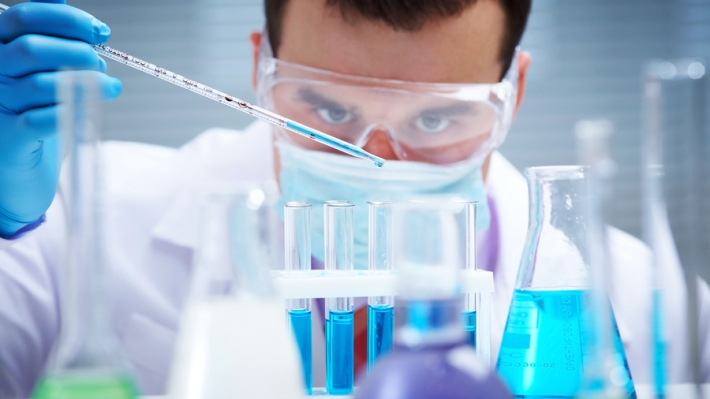


# <center>Pymaceuticals
   <center>Swati Oberoi Dham


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import sem


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# ----- understanding the mouse data-----
mouse_metadata
#Looking for null values
mouse_metadata.count() # no null values
#looking for duplicates
mouse_metadata.duplicated().sum() # no duplicates
mouse_metadata.rename(columns = {'Mouse ID':'MouseID', 'Weight (g)' : 'Weight'}, inplace = True) # renaming columns for easier access

# ----- understanding the study results data-----
study_results
#looking for null values
study_results.count() # no null values
#Looking for duplicates
study_results.duplicated().sum() # 1 duplicate entry

#Looking for the duplicate entry
study_results.loc[study_results.duplicated() ==True, :]
study_results.rename(columns = {'Mouse ID':'MouseID', 'Weight (g)' : 'Weight'}, inplace = True) # renaming columns for easier access

# # Combine the data into a single dataset

df = pd.merge(mouse_metadata, study_results, on='MouseID', how = 'left')

# # Display the data table for preview
df

,MouseID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
df['MouseID'].nunique()


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = df.groupby(['MouseID','Timepoint']).head()
dup_mice


,MouseID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

df.loc[df['MouseID']=='g989',:] #entry 137 is a duplicate of entry 107

,MouseID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
dup_mice.loc[dup_mice.duplicated()==True,:]
#thus mouse ID 'g989' has duplicate entries

,MouseID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
c_df = df.loc[df['MouseID']!='g989',:]
c_df


,MouseID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
c_df.count() #1880 rows
#no. of entries have dropped from 1880 to 1892
c_df['MouseID'].nunique()
#total number of unique mice

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

new_df = c_df.rename(columns = {'Mouse ID':'MouseID', 'Drug Regimen' : 'DrugRegimen', 'Weight (g)':'Weight', 'Tumor Volume (mm3)': 'TumorVol', 'Metastatic Sites': 'MSites'})
mean = new_df.groupby('DrugRegimen').TumorVol.mean()
med = new_df.groupby('DrugRegimen').TumorVol.median()
dev = new_df.groupby('DrugRegimen').TumorVol.std()
var = new_df.groupby('DrugRegimen').TumorVol.var()
sem = new_df.groupby('DrugRegimen').TumorVol.sem()

summary= pd.DataFrame({'Mean Tumor Volume': mean, 'Median  Tumor Volume':med, ' Tumor Volume Standar Deviation': dev, ' Tumor Volume Variance': var, ' Tumor Volume Std. Error': sem})
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Standar Deviation,Tumor Volume Variance,Tumor Volume Std. Error
DrugRegimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [11]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_new = new_df.groupby('DrugRegimen').agg(({"TumorVol":["mean","median","var","std","sem"]}), header='Summary Statistics NEW' )
summary_new.rename(columns = {"mean": 'Mean T Vol',"median": 'Median T Vol',"var": 'T Vol Variance',"std": 'T Vol Std Dev',"sem":'Std. Error'}, inplace = True)
print(summary_new)

              TumorVol                                                     
            Mean T Vol Median T Vol T Vol Variance T Vol Std Dev Std. Error
DrugRegimen                                                                
Capomulin    40.675741    41.557809      24.947764      4.994774   0.329346
Ceftamin     52.591172    51.776157      39.290177      6.268188   0.469821
Infubinol    52.884795    51.820584      43.128684      6.567243   0.492236
Ketapril     55.235638    53.698743      68.553577      8.279709   0.603860
Naftisol     54.331565    52.509285      66.173479      8.134708   0.596466
Placebo      54.033581    52.288934      61.168083      7.821003   0.581331
Propriva     52.320930    50.446266      43.852013      6.622085   0.544332
Ramicane     40.216745    40.673236      23.486704      4.846308   0.320955
Stelasyn     54.233149    52.431737      59.450562      7.710419   0.573111
Zoniferol    53.236507    51.818479      48.533355      6.966589   0.516398


## Bar and Pie Charts

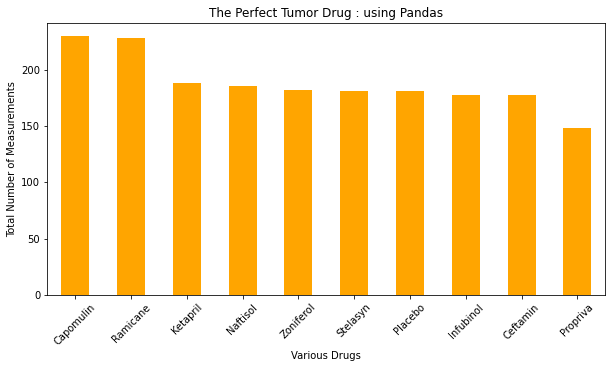

In [15]:
bardf = new_df.groupby('DrugRegimen').MouseID.count()
bardf = bardf.sort_values(ascending = False)
ax = bardf.plot(kind = 'bar', figsize=(10,5), color = 'orange', rot = 45, title = 'The Perfect Tumor Drug : using Pandas', xlabel = 'Various Drugs',  ylabel = 'Total Number of Measurements', fontsize = 10)

plt.show()

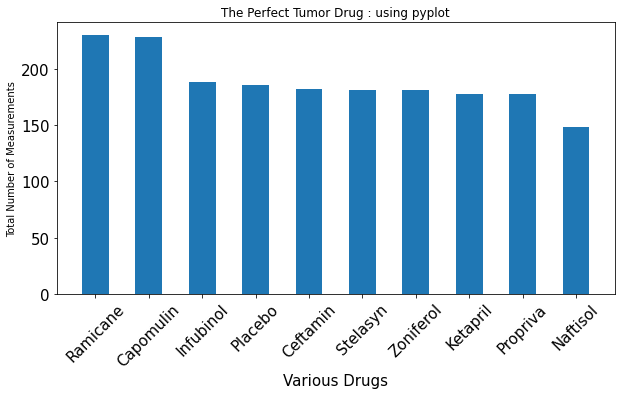

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
y_axis = new_df.groupby('DrugRegimen').MouseID.count()
x_axis = new_df['DrugRegimen'].unique()
y_axis = y_axis.sort_values(ascending=False)
plt.figure(figsize = (10,5))
plt.bar(x_axis,y_axis, width = 0.5)

 
# plt.bar(x_axis,y_axis, width = 0.5)
#Cosmetic Settings
plt.title('The Perfect Tumor Drug : using pyplot')
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15)
plt.xlabel('Various Drugs',fontsize=15)
plt.ylabel('Total Number of Measurements',fontsize=10)
plt.show()


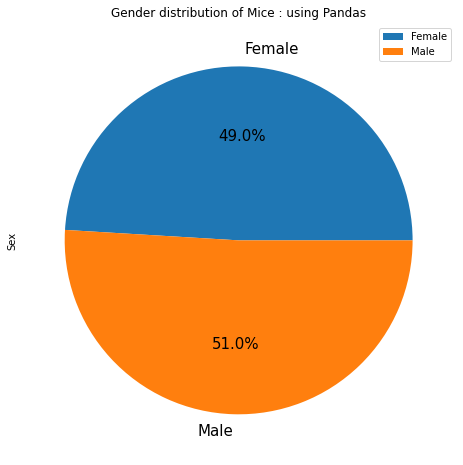

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

new_df.groupby('Sex').MouseID.count().plot(kind = 'pie', legend = True, figsize = (8,8) ,fontsize = 15,  autopct = '%1.1f%%', title = 'Gender distribution of Mice : using Pandas')
plt.ylabel('Sex')
plt.show()


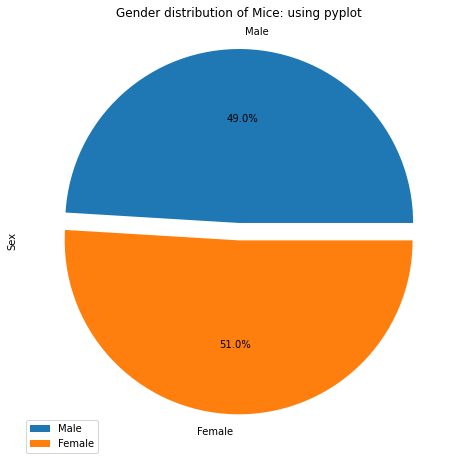

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize = (8,8))
plt.pie(new_df.groupby('Sex').MouseID.count(), explode = (0.1,0), labels = ('Male', 'Female'), autopct = '%1.1f%%')
plt.title('Gender distribution of Mice: using pyplot')
plt.ylabel('Sex')
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

Capomulin 's potential outliers:  N/A
Ramicane 's potential outliers:  N/A
Infubinol 's potential outliers:  36.321345799999996
Ceftamin 's potential outliers:  N/A


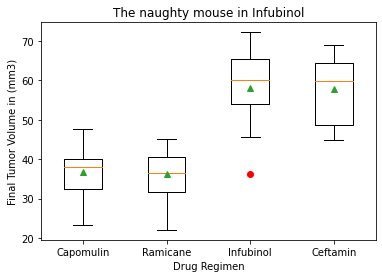

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs = ['Capomulin', 'Ramicane', 'Infubinol',  'Ceftamin']
tumor_vol = []
outlier = 'N/A'
fig1, ax1 = plt.subplots()
ax1.set_title('The naughty mouse in Infubinol')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume in (mm3)')
# plt.xticks(drugs)
for each_drug in drugs:
    treat_df = new_df.loc[new_df['DrugRegimen']==each_drug]
# Start by getting the last (greatest) timepoint for each mouse
    time = treat_df.groupby('MouseID').Timepoint.max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
    final_tumor_df = pd.merge(time, new_df, how = 'inner', on = ('MouseID','Timepoint'))
# Locate the rows which contain mice on each drug and get the tumor volumes
    tvol = final_tumor_df['TumorVol'] # final tumor volume
# add subset
    tumor_vol.append(tvol)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    mean = np.mean(tumor_vol)
    median = np.median(tumor_vol)
    q1 = np.quantile(tvol,0.25) 
    q3 = np.quantile(tvol,0.75)
    IQR = q3 - q1
# Determine outliers using upper and lower bounds
    upbound = q3+(1.5* IQR)
    lowbound = q1-(1.5*IQR)
    
    for tum in tvol:
        if tum<lowbound:
             outlier = tum
          
        if tum>upbound:
            outlier = tum
    print(each_drug,"'s potential outliers: ",outlier)
    outlier = 'N/A'
             
           
            
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
ax1.boxplot(tumor_vol, labels = drugs, manage_ticks = True, sym = 'r', showmeans = True)


plt.show()

## Line and Scatter Plots

Enter the mouse IDs185


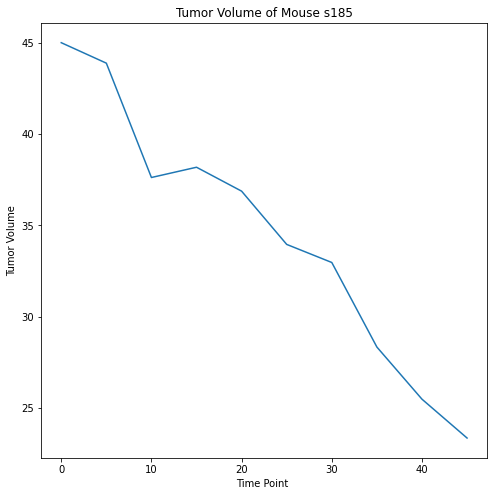

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
dataset = new_df.loc[new_df['DrugRegimen']=='Capomulin',:]
mouse = input('Enter the mouse ID')


mouse_df = dataset.loc[dataset['MouseID']== mouse,:]
if mouse_df.empty:
    print('Mouse not found')
else:
    tumor = mouse_df['TumorVol']
    tp = mouse_df['Timepoint']
    plt.figure(figsize=(8,8))
    plt.plot(tp,tumor)
    plt.xlabel('Time Point ')
    plt.ylabel('Tumor Volume')
    plt.title(f'Tumor Volume of Mouse {mouse}')

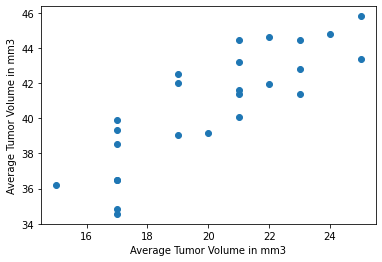

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tum_vol = dataset.groupby(['MouseID']).mean()['TumorVol']

new = pd.merge(mouse_metadata,avg_tum_vol, how = 'inner', on = 'MouseID')
# new.plot('Weight', 'TumorVol', kind = 'scatter', figsize = (8,8), title = 'Heavier Mice have more Tumor',  ylabel= 'Weight of the mouse in (g)')
x_axis=new['Weight']
y_axis = new['TumorVol']

plt.scatter(x_axis,y_axis)
plt.xlabel('Average Tumor Volume in mm3')
plt.ylabel('Average Tumor Volume in mm3')
plt.show()

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [24]:
sts.pearsonr(new['Weight'],new['TumorVol'])


(0.8419363424694718, 1.3225722434712687e-07)

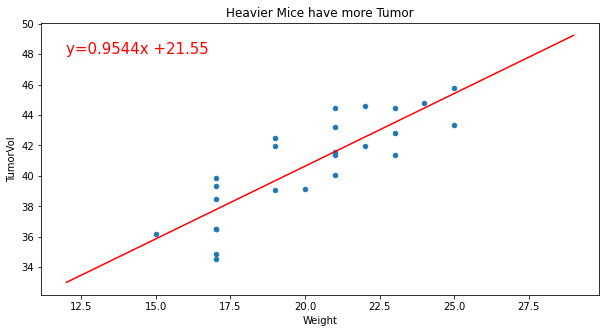

********************   Regression Model    **********************
Slope: 0.9544396890241046 
Intercept: 21.552160532685015 
R-Value- 0.841936342469472 
p-value- 1.3225722434712478e-07 
Std. Error- 0.1275435903320133


In [35]:
m,b,r,p,stde = sts.linregress(new['Weight'],new['TumorVol'])
x = np.arange(12,30,1)
y_pred = (m*x)+ b
new.plot('Weight','TumorVol', kind = 'scatter', figsize = (10,5), fontsize = 10, title = 'Heavier Mice have more Tumor', xlabel = 'Tumor Volume in mm3', ylabel= 'Weight of the mouse in (g)')
plt.plot(x,y_pred, color='r')
plt.annotate('y=0.9544x +21.55' , (12,48), color = 'r', fontsize = 15)
plt.show()
print('********************   Regression Model    **********************')
print('Slope:',m,'\nIntercept:',b,'\nR-Value-',r,'\np-value-',p,'\nStd. Error-',stde)

# Observations
1. During the trials nearly equal number of male and female mice were used . This is good as it removes any bais that may occur due to gender during trails
2. Maximum mice were administered the drugs Capmulin and Ramicane
3. The heavier mice are prone to more tumor as there is a strong positive correlation between the weight of the mice and the volume of the tumor.
for every 1 gm increase in the weight of the mouse there is nearly 1 mm3 increase of tumor volume
